In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_all = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
len(df_all)

1

In [6]:
mars_temp = df_all[0]
mars_temp.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [7]:
mars_temp.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [10]:
from datetime import datetime

mars_temp['terrestrial_date'] = pd.to_datetime(mars_temp['terrestrial_date'])

In [11]:
mars_temp.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [20]:
# How many months exist on Mars?
mars_temp.month.value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

As we have data for 12 different months, we can say that 12 different months exist on Mars.

In [23]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
mars_temp.sol.nunique()

1867

Total 1867 unique martian days exist in the dataset.

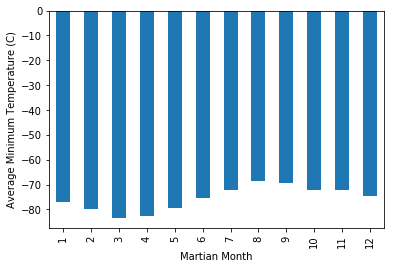

In [34]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)?
mars_temp.groupby('month')['min_temp'].mean().plot(kind='bar')
plt.ylabel('Average Minimum Temperature (C)')
plt.xlabel('Martian Month')
plt.show()

From the plot, the month 3 is the coldest and minth 8 is the warmest.

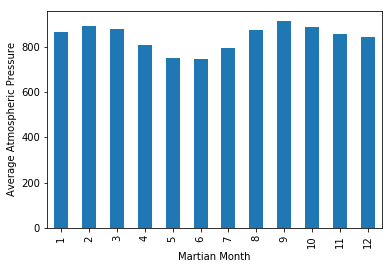

In [35]:
# Which months have the lowest and the highest atmospheric pressure on Mars?
mars_temp.groupby('month')['pressure'].mean().plot(kind='bar')
plt.ylabel('Average Atmospheric Pressure')
plt.xlabel('Martian Month')
plt.show()

From the plot, month 6 has the lowest average pressure and month 9 has the highest average pressure.

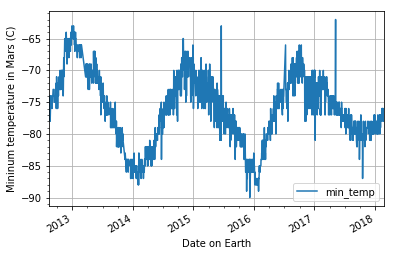

In [39]:
# About how many terrestrial (Earth) days exist in a Martian year?
mars_temp.plot(kind='line', x='terrestrial_date', y='min_temp')
plt.xlabel('Date on Earth')
plt.ylabel('Mininum temperature in Mars (C)')
plt.minorticks_on()
plt.grid()
plt.show()

In [40]:
# Export the DataFrame to a CSV file.
mars_temp.to_csv('mars_temp_data.csv')